In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
(df["gender"] == "Other").sum(),(df["gender"] == "Female").sum(),(df["gender"] == "Male").sum()

(18, 58552, 41430)

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df = pd.get_dummies(data=df,drop_first =False)

In [8]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  uint8  
 8   gender_Male                  100000 non-null  uint8  
 9   gender_Other                 100000 non-null  uint8  
 10  smoking_history_No Info      100000 non-null  uint8  
 11  smoking_history_current      100000 non-null  uint8  
 12  smoking_history_ever         100000 non-null  uint8  
 13  

<AxesSubplot:title={'center':'correlation of features with diabetes'}>

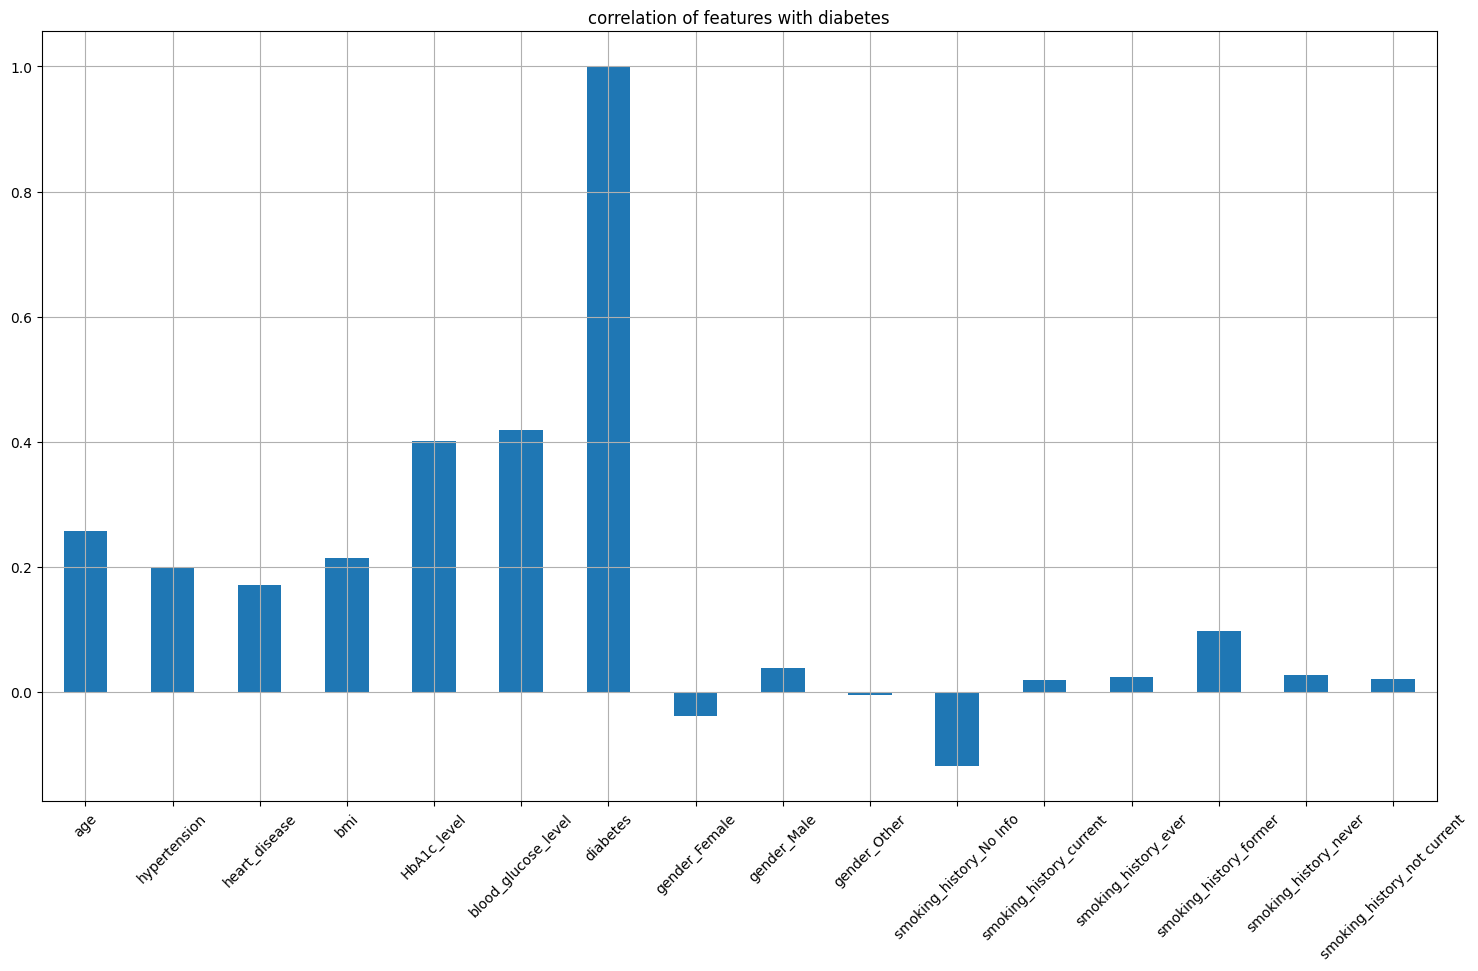

In [10]:
df.corrwith(df['diabetes']).plot.bar(
    figsize = (18,10) , title = 'correlation of features with diabetes' ,rot=45,grid=True
)


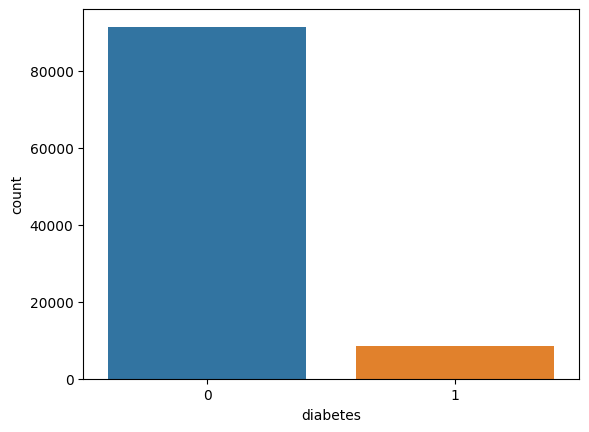

In [11]:
sns.countplot(x='diabetes', data=df, order=[0, 1])
plt.show()

In [12]:
corr = df.corr()

In [13]:
corr


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,0.030480,-0.030282,-0.007348,-0.276945,0.030946,0.065768,0.216481,0.065498,0.067663
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,-0.014318,0.014423,-0.003816,-0.117210,0.017930,0.023124,0.083401,0.045953,0.000997
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,-0.077832,0.077911,-0.002718,-0.052398,0.007604,0.040671,0.095194,-0.030843,0.007922
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,0.023016,-0.023021,0.000119,-0.222553,0.053617,0.044343,0.111312,0.086849,0.034979
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,-0.020015,0.020058,-0.001528,-0.045979,0.006123,0.009655,0.037306,0.010684,0.009830
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,-0.017200,0.017189,0.000457,-0.051635,0.012447,0.006267,0.040688,0.012475,0.008613
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,-0.037553,0.037666,-0.004090,-0.118939,0.019606,0.024080,0.097917,0.027267,0.020734
gender_Female,0.030480,-0.014318,-0.077832,0.023016,-0.020015,-0.017200,-0.037553,1.000000,-0.999629,-0.015948,-0.053810,-0.026517,-0.011019,-0.048927,0.098682,0.011419
gender_Male,-0.030282,0.014423,0.077911,-0.023021,0.020058,0.017189,0.037666,-0.999629,1.000000,-0.011285,0.053833,0.026636,0.010991,0.049048,-0.098547,-0.011985
gender_Other,-0.007348,-0.003816,-0.002718,0.000119,-0.001528,0.000457,-0.004090,-0.015948,-0.011285,1.000000,-0.000695,-0.004293,0.001062,-0.004310,-0.005181,0.020760


<AxesSubplot:>

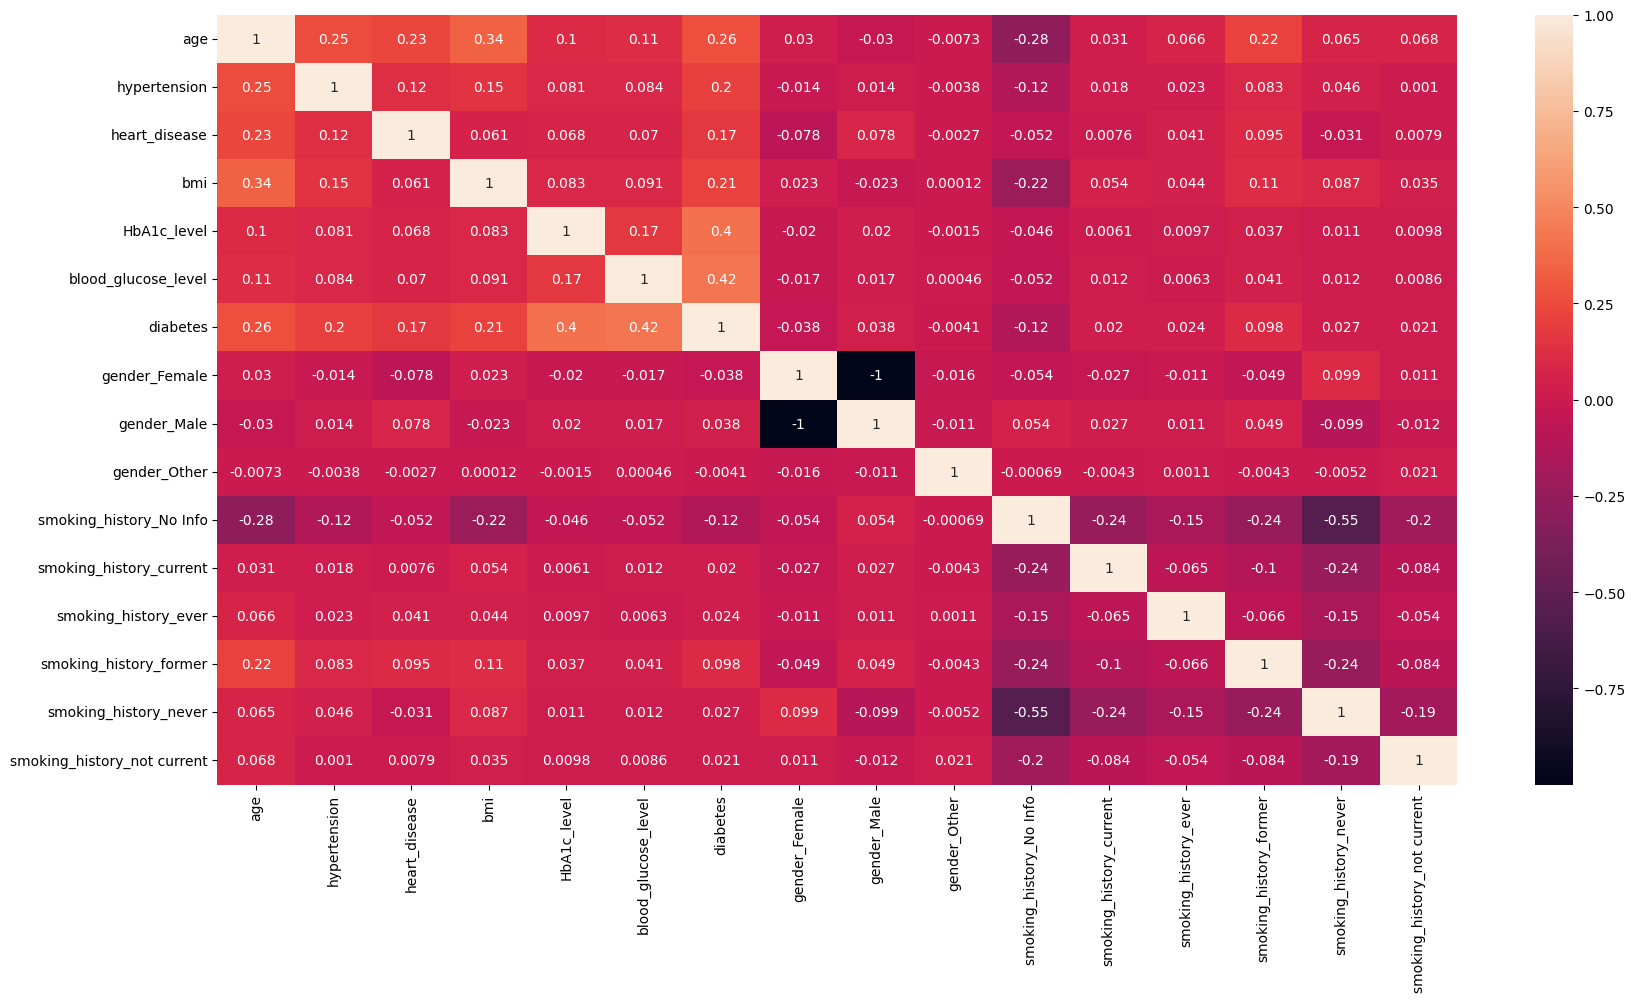

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True)

In [15]:
df_2 = df.drop(columns = 'diabetes')
df_3 = df['diabetes']
x = df_2.iloc[:,:].values
y = df_3.iloc[:].values

In [16]:
x,y

(array([[80.,  0.,  1., ...,  0.,  1.,  0.],
        [54.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  1.,  0.],
        ...,
        [66.,  0.,  0., ...,  1.,  0.,  0.],
        [24.,  0.,  0., ...,  0.,  1.,  0.],
        [57.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((75000, 15), (75000,), (25000, 15), (25000,))

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)
y_pred = classifier_lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[22648,   202],
       [  827,  1323]])

In [21]:
acc_lr = accuracy_score(y_test,y_pred)
acc_lr

0.95884

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.961


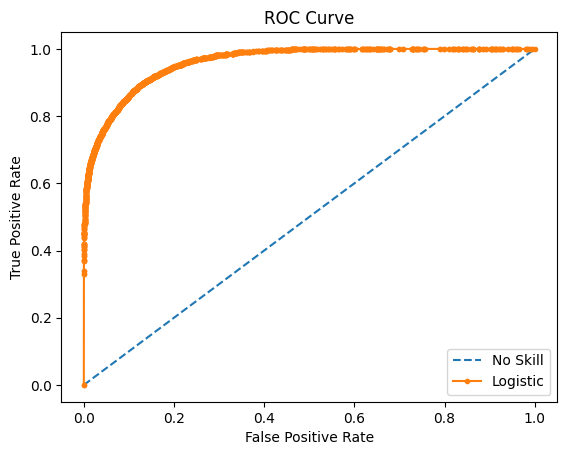

In [22]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = classifier_lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
classifier_rm = RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train,y_train)
y_pred = classifier_rm.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[22772,    78],
       [  687,  1463]])

In [24]:
acc_rm = accuracy_score(y_test,y_pred)
acc_rm

0.9694

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.961


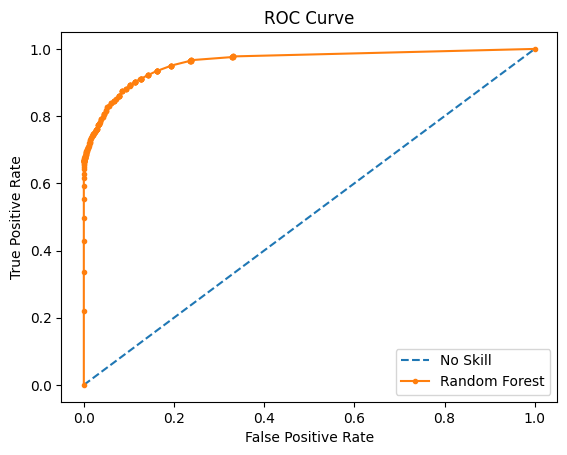

In [25]:
ns_probs = [0 for _ in range(len(y_test))]
rm_probs = classifier_rm.predict_proba(x_test)
rm_probs = rm_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
rm_auc = roc_auc_score(y_test, rm_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rm_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rm_fpr, rm_tpr, _ = roc_curve(y_test, rm_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rm_fpr, rm_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

In [26]:
classifier_gnb = GaussianNB()
classifier_gnb.fit(x_train, y_train)
y_pred = classifier_gnb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5302, 17548],
       [    4,  2146]])

In [27]:
acc_gnb = accuracy_score(y_test,y_pred)
acc_gnb

0.29792

No Skill: ROC AUC=0.500
Gaussian Naive Bayes: ROC AUC=0.912


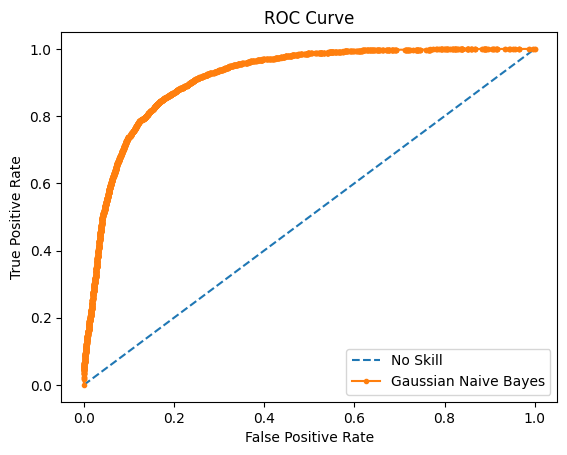

In [28]:
ns_probs = [0 for _ in range(len(y_test))]
gnb_probs = classifier_gnb.predict_proba(x_test)
gnb_probs = gnb_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian Naive Bayes: ROC AUC=%.3f' % (gnb_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

In [29]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)
y_pred = classifier_xgb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[22788,    62],
       [  677,  1473]])

In [30]:
acc_xgb = accuracy_score(y_test,y_pred)
acc_xgb

0.97044

No Skill: ROC AUC=0.500
XgBoost: ROC AUC=0.978


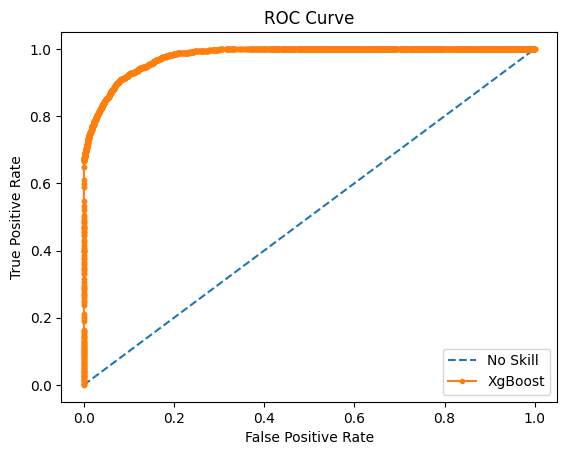

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
xgb_probs = classifier_xgb.predict_proba(x_test)
xgb_probs = xgb_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XgBoost: ROC AUC=%.3f' % (xgb_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XgBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

In [32]:
results= pd.DataFrame([['Logistic Regression',acc_lr,lr_auc],
                      ['Random Forest',acc_rm,rm_auc],
                      ['Naive Bayes',acc_gnb,gnb_auc],
                      ['XgBoost',acc_xgb,xgb_auc]
                      ] ,
                      columns= ['Model','Accuracy','AUC'])
results

,Model,Accuracy,AUC
0,Logistic Regression,0.95884,0.961251
1,Random Forest,0.96940,0.961256
2,Naive Bayes,0.29792,0.912289
3,XgBoost,0.97044,0.978483


**The best model is XgBoost based on accuracy and AUC scores**

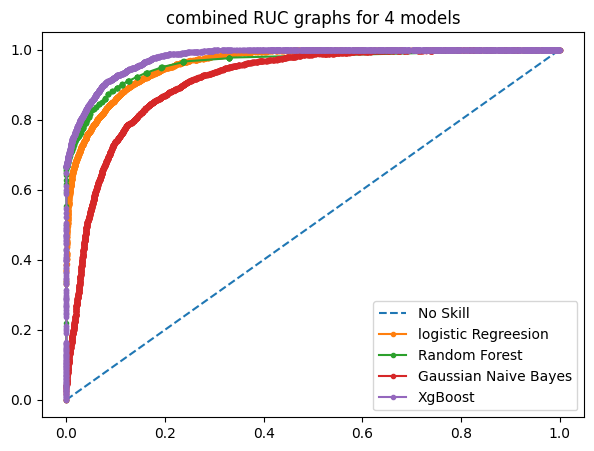

In [33]:
plt.figure(figsize = (7,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='logistic Regreesion')
plt.plot(rm_fpr, rm_tpr, marker='.', label='Random Forest')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XgBoost')
plt.title("combined RUC graphs for 4 models")
plt.legend()
plt.show()